# Plotting data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import sys, os
os.chdir("..")

# sys.path.insert(0,'..')
import src.parse as parse
from src.plot import plot_all

In [2]:
G = parse.parse("X-n120-k6")
data = parse.parse_output("output_uchoa/X-n120-k6-ng8.log")
data_cyc2 = pd.read_csv("output_uchoa/X-n120-k6-cyc2.log", header=17 ,skipfooter=81, engine="python", sep=", ")
data_spprc = pd.read_csv("output_uchoa/X-n120-k6-SPPRC.log", header=17 ,skipfooter=244-128, engine="python", sep=", ")

MAIN: Instance X-n120-k6
PARSE: There is no minimum number of trucks.
PARSE: Using the provided K = 0
PARSE: Writing to file output/X-n120-k6.log


In [29]:
data.iloc[-1:]

,method,python time,total time,propagated dominance time,unpropagated dominance time,pricing_success,upper_bound,lower_bound,abort_early,"num_paths,"
291,ng8,-0.0,2.1,1.6,0.1,1,12939.6222,12939.6222,0,0


In [30]:
data = pd.concat((data,data.iloc[-1:]))
data

,method,python time,total time,propagated dominance time,unpropagated dominance time,pricing_success,upper_bound,lower_bound,abort_early,"num_paths,"
0,ng8,0.5,0.0,0.0,0.0,1,13274.7112,-89002.0255,0,1438
1,ng8,0.5,0.0,0.0,0.0,1,13274.7112,-86680.3921,0,1498
2,ng8,0.5,0.0,0.0,0.0,1,13274.7112,-114287.8669,0,1440
3,ng8,0.6,0.0,0.0,0.0,1,13274.7112,-90888.2023,0,1661
4,ng8,0.6,0.0,0.0,0.0,1,13274.7112,-32300.4338,0,1526
...,...,...,...,...,...,...,...,...,...,...
288,ng8,0.0,2.1,1.6,0.1,1,12939.6266,12928.8684,0,12
289,ng8,0.0,2.1,1.6,0.1,1,12939.6264,12935.0405,0,5
290,ng8,-0.0,2.1,1.6,0.1,1,12939.6259,12938.0646,0,3
291,ng8,-0.0,2.1,1.6,0.1,1,12939.6222,12939.6222,0,0


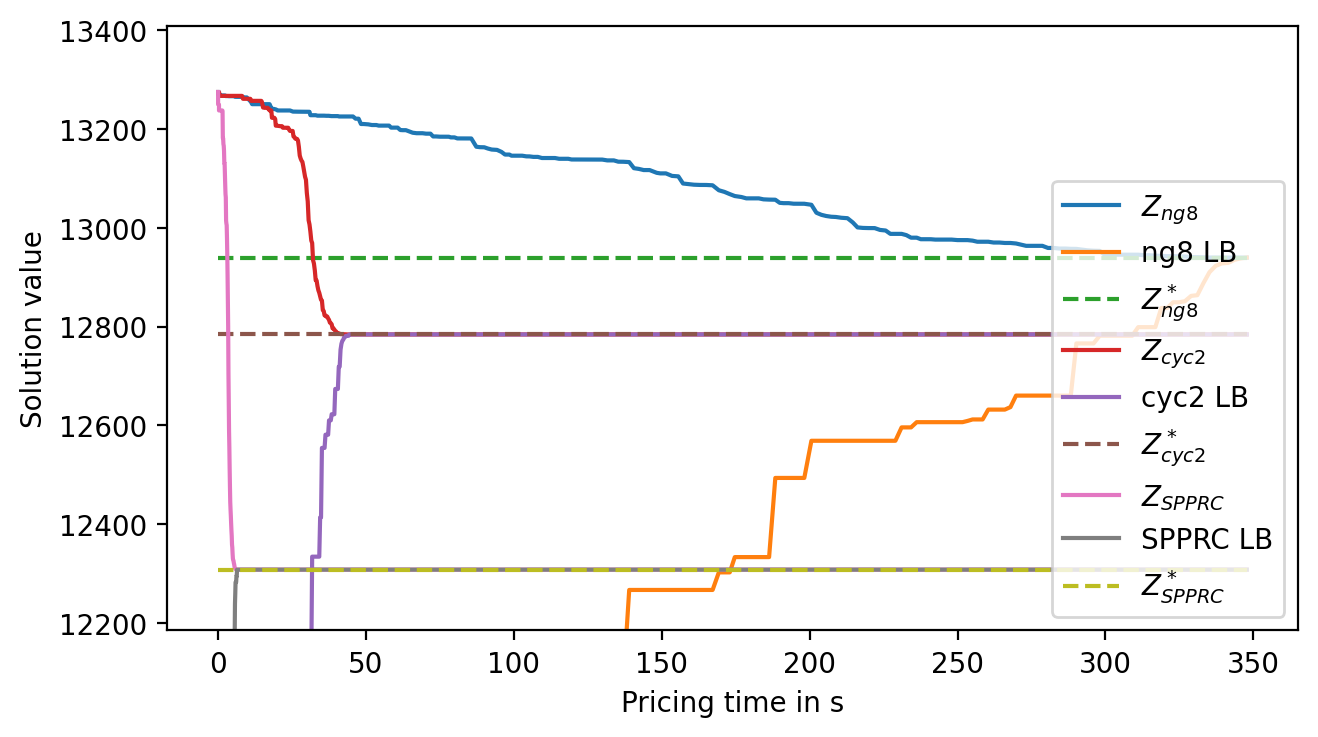

In [3]:
plot_all([data,data_cyc2,data_spprc],time=True)

## Values for the figsize
This value is nice looking for the standard latex layout: plt.figure(figsize=(6.6,4),dpi=100)

This value is nice looking for the CoAn layout: plt.figure(figsize=(7.3,4),dpi=200)

This value is the original value for the presentation but looks horrible: plt.figure(figsize=(4.5,2.5),dpi=200)

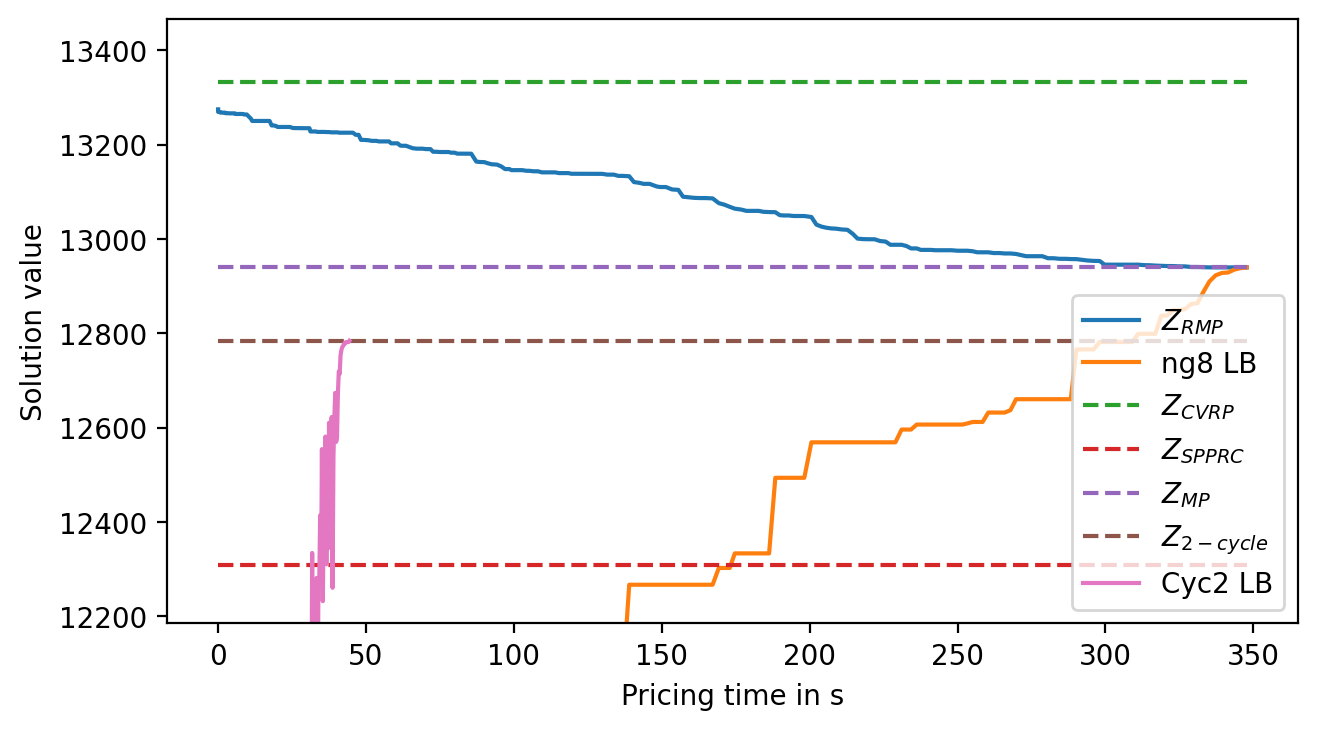

In [5]:
plt.figure(figsize=(7.3,4),dpi=200)
x_values = data['total time'].copy().cumsum()
# x_values = list(range(data.shape[0]))

upper_bounds = data['upper_bound']
plt.plot(x_values, upper_bounds, label="$Z_{\mathit{RMP}}$")

lower_bounds = data['lower_bound']
lower_bounds = []
best_lb = data['lower_bound'][0]
for lb in data['lower_bound']:
    if lb > best_lb:
        best_lb = lb
    lower_bounds.append(best_lb)
method = data['method'][0]
plt.plot(x_values, lower_bounds, label=f'{method} LB')

optimal = [13332 for i in range(len(upper_bounds))]
plt.plot(x_values, optimal, "--", label="$Z_{CVRP}$")

spprc = [12308 for i in range(len(upper_bounds))]
plt.plot(x_values,spprc, "--", label="$Z_{\mathit{SPPRC}}$")

# ng8 = [481 for i in range(len(upper_bounds))]
# plt.plot(ng8, label="Optimal value of ng 8.")

# if pricer.data['farley']:
#     farley_bounds = pricer.data['farley_bound']
#     plt.plot(x_values, farley_bounds, label="Farley Bound")

solval = upper_bounds.iloc[-1]
sol = [solval for i in range(len(upper_bounds))]
plt.plot(x_values, sol, "--",label="$Z_{MP}$")

cyc2 = [12784 for i in range(len(upper_bounds))]
plt.plot(x_values,cyc2, "--", label="$Z_{\mathit{2-cycle}}$")

# T = nx.minimum_spanning_tree(G)
# K = G.graph['min_trucks']
# lowest_remaining_edge_weights = [weight for u,v,weight in G.edges().data('weight') if not T.has_edge(u,v)]
# mst = T.size(weight='weight') + sum(sorted(lowest_remaining_edge_weights)[:K])
# mst = [mst for i in range(len(upper_bounds))]
# plt.plot(x_values, mst, "--", label="MST Bound")

# x_spprc = data_spprc['total time'].copy().cumsum()
# plt.plot(x_spprc, data_spprc['lower_bound'], label="SPPRC LB")

x_cyc2 = data_cyc2['total time'].copy().cumsum()
plt.plot(x_cyc2, data_cyc2['lower_bound'], label="Cyc2 LB")

plt.ylim((spprc[0]*0.99,optimal[0]*1.01))

plt.legend(loc='lower right')
plt.xlabel("Pricing time in s")
plt.ylabel("Solution value")
# plt.savefig("plots/X-n120-k6.zoomed-combined.pgf")
plt.show()